In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class LinearRegression:
    def __init__(self,num_iters,lr):
        self.num_iters = num_iters 
        self.lr = lr
    
    def fit(self,X,y):
        
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.num_iters):
            
            preds = np.dot(self.w,X.T) + self.b
            
            dw = (2/y.shape[0])*np.dot(X.T,(preds - y))
            db = (2/y.shape[0])*np.sum(preds-y)
            
            self.w -= dw * self.lr
            self.b -= db * self.lr
            
    def predict(self,X):
        return np.dot(X,self.w) + self.b

In [16]:
import sklearn
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100,n_features=1,noise=20)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [18]:
model = LinearRegression(500,0.001)
model.fit(X_train,y_train)

In [19]:
predictions = model.predict(X_test)

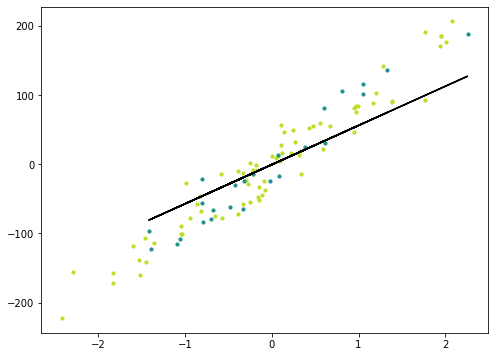

In [23]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X_test,predictions,color='black')
plt.show()